In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
df=pd.read_csv('HousingData.csv')


In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [6]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [7]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [10]:
df['CRIM'].fillna(df['CRIM'].mean(),inplace=True)
df['ZN'].fillna(df['ZN'].mean(),inplace=True)
df['INDUS'].fillna(df['INDUS'].mean(),inplace=True)
df['CHAS'].fillna(df['CHAS'].mean(),inplace=True)
df['AGE'].fillna(df['AGE'].mean(),inplace=True)
df['LSTAT'].fillna(df['LSTAT'].mean(),inplace=True)

In [11]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<Axes: >

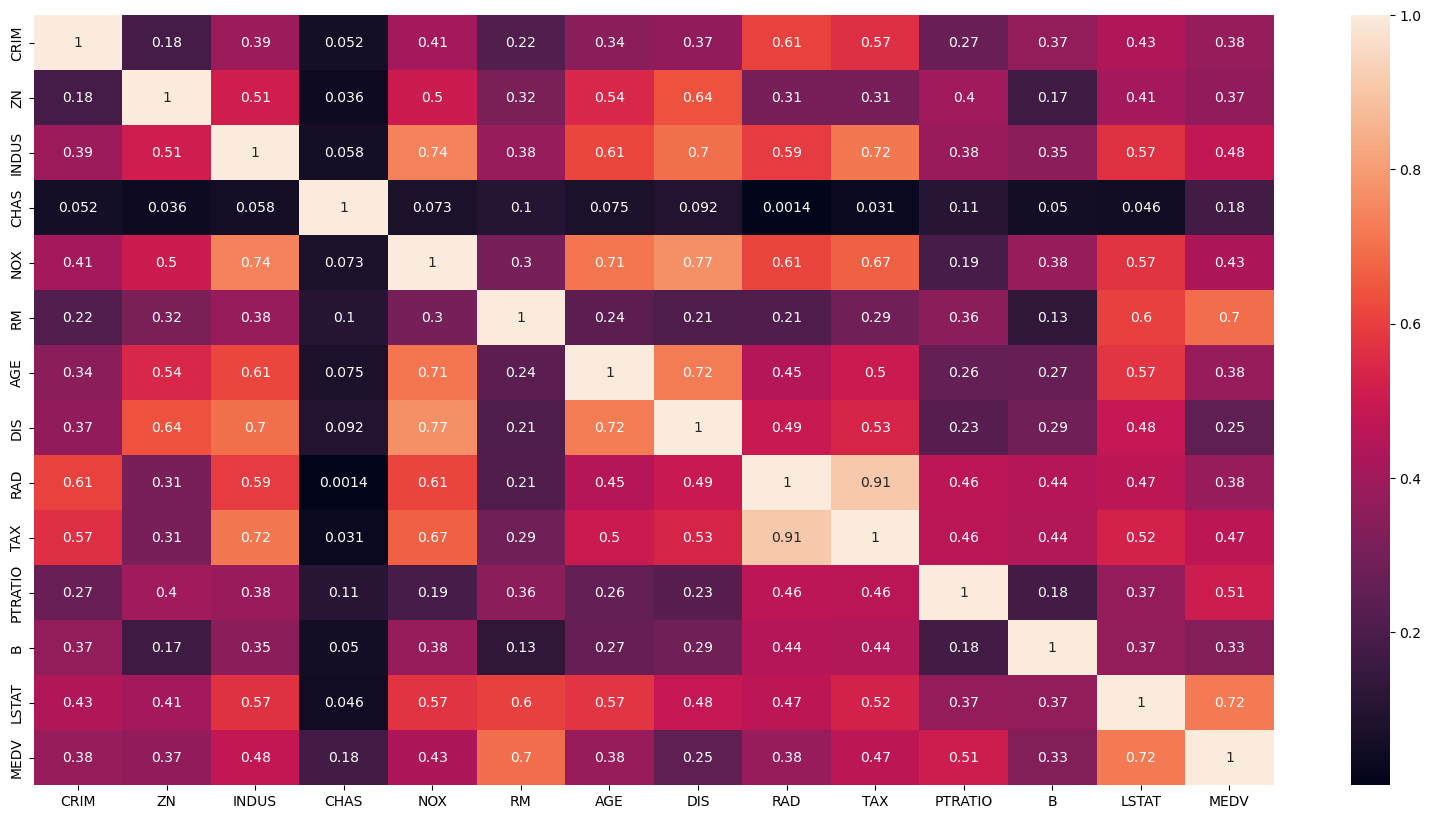

In [13]:
plt.figure(figsize=[20,10])
sns.heatmap(df.corr().abs(),annot=True)

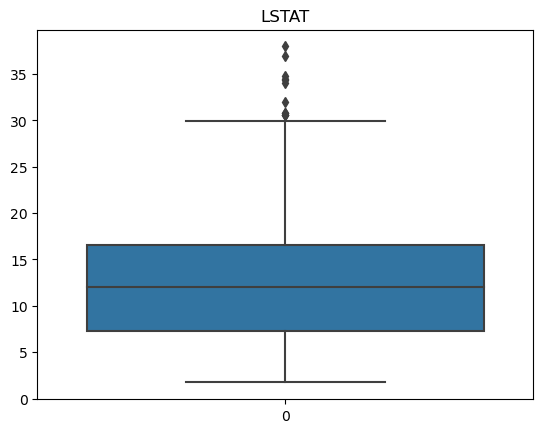

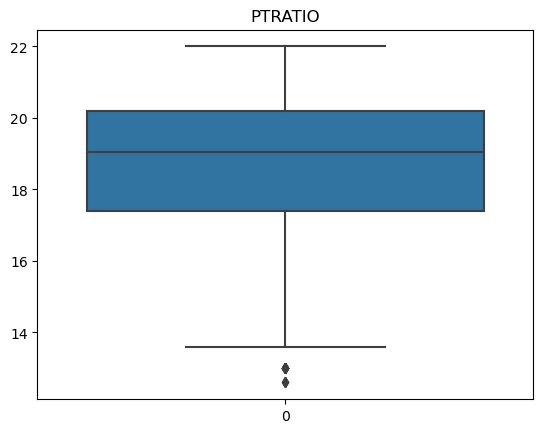

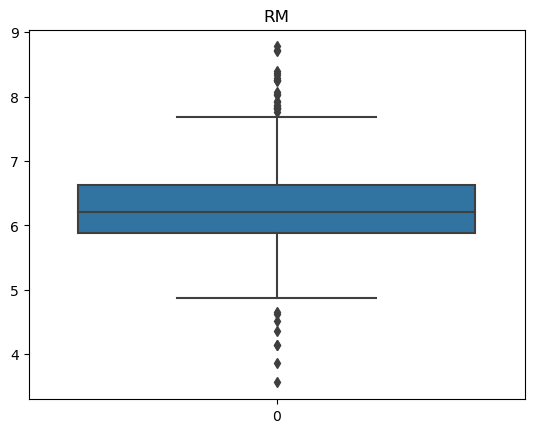

<Figure size 640x480 with 0 Axes>

In [15]:
independent_features=['LSTAT','PTRATIO','RM']
for fea in independent_features:
    plt.title(fea)
    sns.boxplot(df[fea])
    plt.figure()

In [16]:
df.skew()

CRIM       5.318370
ZN         2.302295
INDUS      0.309871
CHAS       3.450763
NOX        0.729308
RM         0.403612
AGE       -0.594261
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.927291
MEDV       1.108098
dtype: float64

In [17]:
df[['LSTAT','PTRATIO','RM']]=StandardScaler().fit_transform(df[['LSTAT','PTRATIO','RM']])

In [18]:
x=df[['LSTAT','PTRATIO','RM']]
y=df['MEDV']

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=45)

In [20]:
model=LinearRegression()


In [21]:
model

LinearRegression()

In [22]:
model.fit(x_train,y_train)

LinearRegression()

In [23]:
result=model.predict(x_test)

In [24]:
model.score(x_train,y_train)

0.6538684203911784

In [25]:
model.score(x_test,y_test)

0.7000978834963384

In [27]:
print(f"RMSE : {(np.sqrt(metrics.mean_squared_error(y_test,result)))}")

RMSE : 5.512548975426883


In [28]:
print(f"MSE : {(metrics.mean_squared_error(y_test,result))}")

MSE : 30.38819620647998


In [29]:
print(f"MAE : {(metrics.mean_absolute_error(y_test,result))}")

MAE : 3.9446830063409766
